In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("new_train.csv")
dataset.name = "dataset"
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
dataset.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [4]:
print(dataset.duplicated().value_counts())

False    32942
True         8
dtype: int64


In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset._get_numeric_data().columns.tolist()

['age', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
# List of categorical variables
categorical_data = dataset.select_dtypes(exclude="number")
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,nonexistent,no
1,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,failure,no
2,retired,married,basic.4y,no,no,no,cellular,jul,mon,nonexistent,yes
3,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4,retired,divorced,university.degree,no,no,no,cellular,jun,tue,nonexistent,no


In [8]:
# List of numerical variables
numerical_data = dataset.select_dtypes(include="number")
numerical_data.head()

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


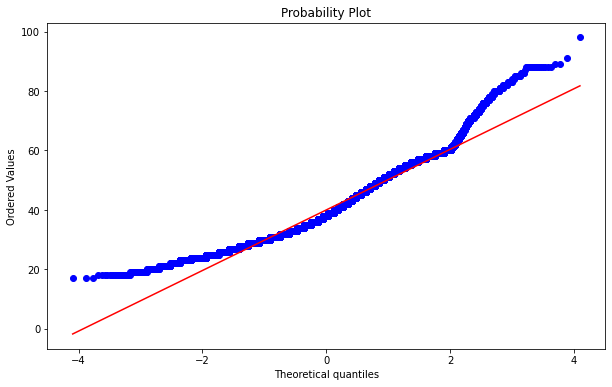

In [9]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(dataset["age"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

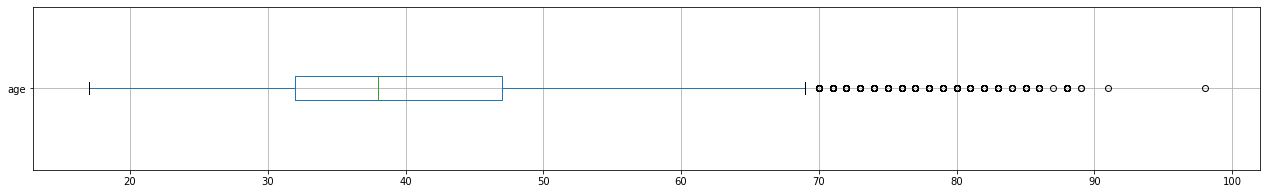

In [10]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(dataset, columns=['age'])
temp_df.boxplot(vert=False)

In [11]:
dataset = dataset[dataset['age']>= 18]
dataset = dataset[dataset['age']< 120]

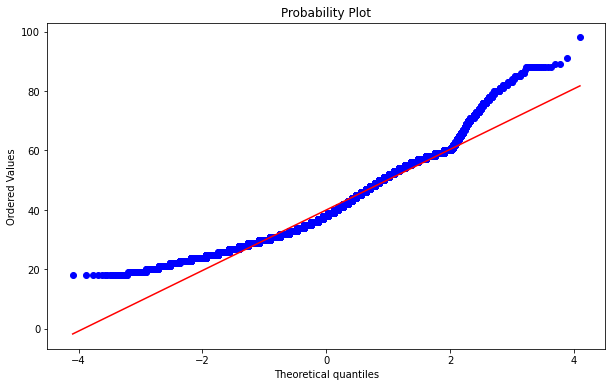

In [12]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(dataset["age"], dist="norm", plot=plt)
plt.show()

In [13]:
dataset=dataset[dataset['previous']<=50]
dataset=dataset.reset_index(drop=True)

In [14]:
# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'pdays']

In [15]:
# list numerical columns
num_cols = ['duration', 'balance', 'campaign','day', 'age', 'previous']

In [16]:
# making pdays as Categorical (-1 no call)
dataset.pdays = pd.Categorical(dataset.pdays)

In [17]:
# Y into 1 and 0
dataset['y'] = (dataset.y == 'yes').astype('int')

In [18]:
# Dummies
dataset = pd.get_dummies(dataset)
dataset.head()

,age,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,36,120,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,59,368,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
# import library for rescaling
from sklearn.preprocessing import StandardScaler

In [20]:
dataset.head()

,age,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_20,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,37,202,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,78,1148,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,36,120,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,59,368,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
x = dataset.drop(['y'],axis=1)
y=dataset['y']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=10)

In [23]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
svm = SVC()
gnb = GaussianNB()

In [24]:
svm.fit(x_train,y_train)

SVC()

In [25]:
gnb.fit(x_train,y_train)

GaussianNB()

In [26]:
svm.score(x_test,y_test)

0.8932726353060192

In [27]:
gnb.score(x_test,y_test)

0.8874051593323217